# Trainging a Classifier
After getting familiar with the data, we want to train a model which shall classify the data. Since the data is labeled, we can run a supervised training

## Loading the Data
As shown before, we need to loda the dataframe first:

In [1]:
import pandas as pd

data_directory = 'http://hadron.physics.fsu.edu/~dlersch/GlueX_PANDA_EIC_ML_Workshop'
data_name = 'hands_on_data_033_033_033.csv'
dataFrame = pd.read_csv(data_directory + '/' + data_name)

## Setting up two Classifier
Now we make use of the fast scikit library which offers many algorithms. A detailed describtion of the classifier available can be found here: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning For now, we will just train two classification algorithms: i) Neural Network and ii) A radnom forest classifier. These are the most promiment examples for solving classification problems. You are of course welcome to test/choose any other classification algorithm. 

In [2]:
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#1.) Setting up the neural network:
print(" ")
print("Setting up a multilayer perceptron...")

use_mlp_early_stopping = True  #Change this flag to train the MLP with / without early stopping
my_mlp = MLPClassifier(
         hidden_layer_sizes=(5),
         activation='tanh',
         solver='sgd',
         shuffle=True,
         validation_fraction=0.25,#--> Use validation data to avoid overfitting
         early_stopping=use_mlp_early_stopping, #--> Change to disable early stopping and see the difference, no validation curve available then...
         max_iter = 10,
         learning_rate_init=0.01,
         warm_start=True,
         tol=1e-6
)
print("...done!")
print(" ")

#2.) Setting up the random forest:
print(" ")
print("Setting up a radnom forest...")
my_rf = RandomForestClassifier(
         n_estimators=10, #--> Number of trees in your forest
         warm_start=True,
         max_depth=5, #--> Maximum depth of tree
         bootstrap=True, #--> Sample subsets from the training data to train each tre with an indiviudal set
         random_state=0
)
print("...done!")
print(" ")


Setting up a multilayer perceptron...
...done!
 
 
Setting up a radnom forest...
...done!
 


## Preparing the Data for Training
After setting up the classifier, we need to prepare the data properly, i.e. define the input features (X) and targets (Y). This can be easily done using the pandas librabry. Finally, we normalize and shuffle the data. 

In [3]:
from sklearn.preprocessing import MinMaxScaler

used_features = ['var1','var2','var3','var4'] #--> Change the elements here, in order to use different features
X = dataFrame[used_features].values
Y = dataFrame['label'].values

scaler = MinMaxScaler() 
X = scaler.fit_transform(X) #Uncomment this line to run without feature normalization

x_train, y_train = shuffle(X,Y,random_state=0)

## Training the Neural Network
First, we train the multilayer perceptron (MLP) and check the training curve(s) afterwards:


Train MLP...
...done!
 


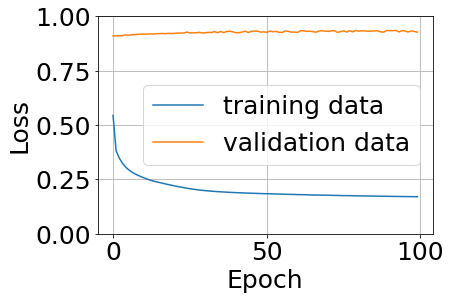

In [4]:
import matplotlib.pyplot as plt

print("  ")
print("Train MLP...")
my_mlp.fit(x_train,y_train)
print("...done!")
print(" ")

#Getting the training/validation scores is quite easy:
plt.rcParams.update({'font.size': 25})

training_curve = my_mlp.loss_curve_
plt.plot(training_curve,label='training data')

if use_mlp_early_stopping:
     validation_curve = my_mlp.validation_scores_
     plt.plot(validation_curve,label='validation data')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.0,1.0)
plt.grid(True)
plt.show()
plt.close()

Finally, we write the mlp model to a file, because we want to use it later many times.

In [5]:
from joblib import dump
dump(my_mlp,'mlp_classifier.joblib')

['mlp_classifier.joblib']

## Training the Random Forest Classifier
In a next step we traing the random forest and store it afterwards

In [6]:
print("  ")
print("Train random forest classifier...")
my_rf.fit(x_train,y_train)
print("...done!")
print(" ")

dump(my_rf,'random_forest_classifier.joblib')


Train random forest classifier...
...done!
 


['random_forest_classifier.joblib']

## Checking the Classifier Predictions
As stated earlier, one of the very first steps after training your model is to check the classifier outputs and the features after classification. First we add the classsifier predictions to the dataframe. This is not always necessary, but it might be sometimes helfpul to store the dataframe including the predictions somewhere. 

In [7]:
print(" ")
print("Add classifier predictions to the dataframe...")

mlp_predictions = my_mlp.predict_proba(X)
rf_predictions = my_rf.predict_proba(X)

dataFrame['MLP_Output1'] = mlp_predictions[:,0]
dataFrame['MLP_Output2'] = mlp_predictions[:,1]
dataFrame['MLP_Output3'] = mlp_predictions[:,2]

dataFrame['RF_Output1'] = rf_predictions[:,0]
dataFrame['RF_Output2'] = rf_predictions[:,1]
dataFrame['RF_Output3'] = rf_predictions[:,2]

print("...done!")
print(" ")

print("Just to be sure, check the dataframe:")
print(dataFrame.head(10))
print(" ")



Add classifier predictions to the dataframe...
...done!
 
Just to be sure, check the dataframe:
       var1      var2      var3      var4      var5      var6  label  \
0  1.058485  0.966484  0.018853  0.004739  0.947370  0.718451    2.0   
1  4.592704  3.808958  0.021037  0.005426  3.360293  0.481386    2.0   
2  1.361142  0.213187  0.003005  0.003969  0.243650  0.325567    0.0   
3  2.204165  0.969037  0.007780  0.016829  0.719581  0.734593    1.0   
4  0.629281  0.618626  0.024197  0.006617  0.637974  0.576872    2.0   
5  1.048963  0.279840  0.002310  0.003568  0.191373  0.665752    0.0   
6  0.896067  0.329471  0.005907  0.005206  0.325601  0.705401    0.0   
7  0.873841  0.489065  0.018118  0.013656  0.364731  0.681083    1.0   
8  0.330018  0.372559  0.020232  0.022098  0.312272  0.210790    1.0   
9  1.014085  0.706302  0.014414  0.005087  0.791526  0.434839    2.0   

    MLP_Output1  MLP_Output2  MLP_Output3  RF_Output1  RF_Output2  RF_Output3  
0  3.605843e-07     0.000832  

Now plot the outpus for each species and each classifier:

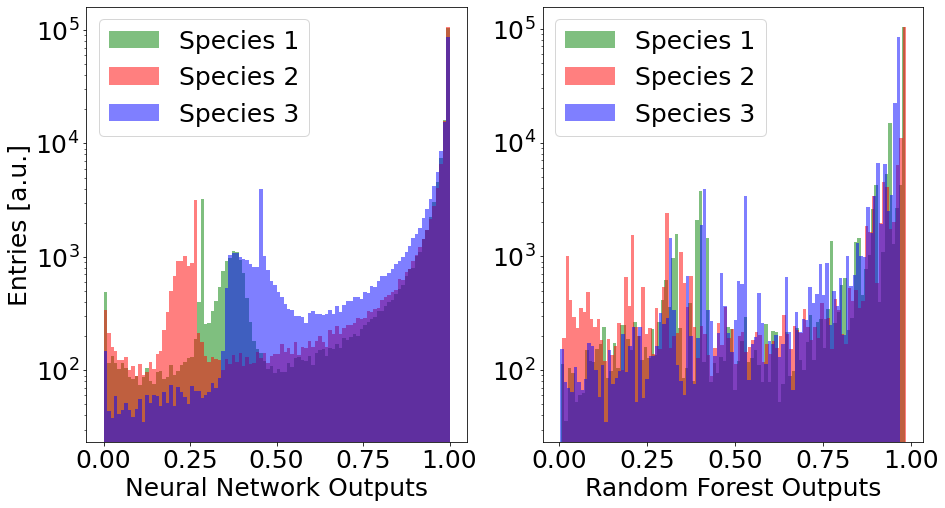

In [8]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15, 8)

ax[0].hist(dataFrame[dataFrame['label']==0.0]['MLP_Output1'],bins=100,facecolor='g',alpha=0.5,label='Species 1',log=True)
ax[0].hist(dataFrame[dataFrame['label']==1.0]['MLP_Output2'],bins=100,facecolor='r',alpha=0.5,label='Species 2',log=True)
ax[0].hist(dataFrame[dataFrame['label']==2.0]['MLP_Output3'],bins=100,facecolor='b',alpha=0.5,label='Species 3',log=True)

ax[1].hist(dataFrame[dataFrame['label']==0.0]['RF_Output1'],bins=100,facecolor='g',alpha=0.5,label='Species 1',log=True)
ax[1].hist(dataFrame[dataFrame['label']==1.0]['RF_Output2'],bins=100,facecolor='r',alpha=0.5,label='Species 2',log=True)
ax[1].hist(dataFrame[dataFrame['label']==2.0]['RF_Output3'],bins=100,facecolor='b',alpha=0.5,label='Species 3',log=True)

ax[0].set_xlabel('Neural Network Outputs')
ax[0].set_ylabel('Entries [a.u.]')
ax[0].legend()

ax[1].set_xlabel('Random Forest Outputs')
ax[1].legend()

plt.show()


Now we will look at the feature distributions after classfying them with the MLP. We will not select a certain species (you can do that...), but look at the entire data, after applying a threshold to the mlp output 1

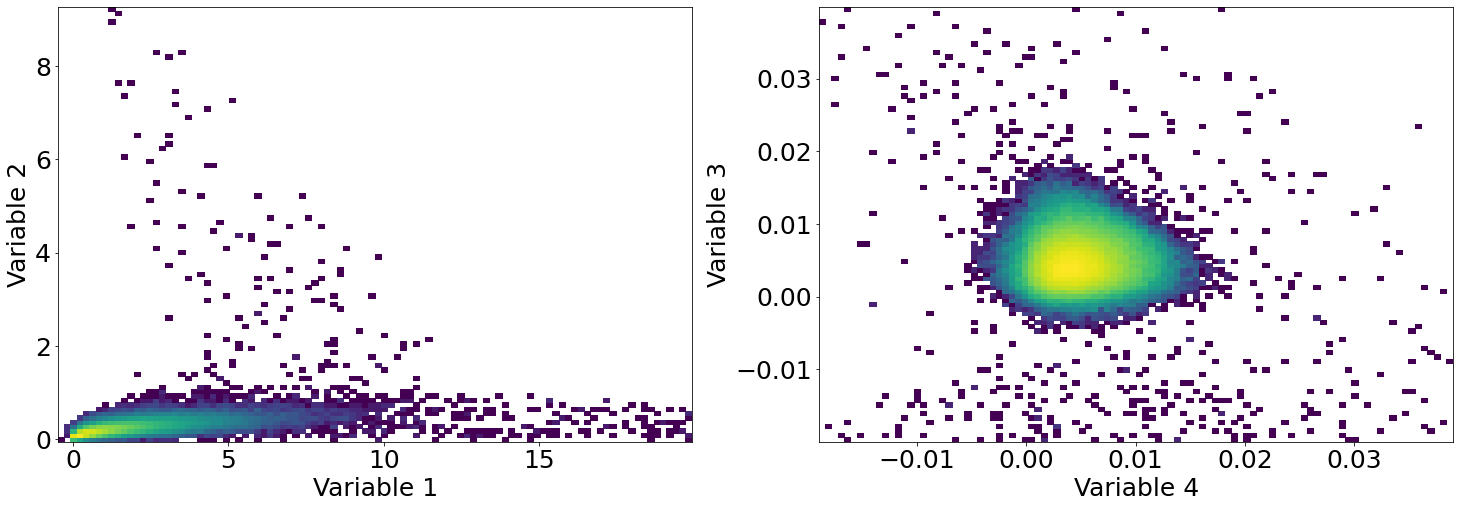

In [9]:
from matplotlib.colors import LogNorm

fig_data,ax_data = plt.subplots(1,2)
fig_data.set_size_inches(25, 8)

threshold = 0.5

ax_data[0].hist2d(dataFrame[dataFrame['MLP_Output1'] > threshold]['var1'],dataFrame[dataFrame['MLP_Output1'] > threshold]['var2'],bins=100,norm=LogNorm())
ax_data[1].hist2d(dataFrame[dataFrame['MLP_Output1'] > threshold]['var3'],dataFrame[dataFrame['MLP_Output1'] > threshold]['var4'],bins=100,norm=LogNorm())

ax_data[0].set_xlabel('Variable 1')
ax_data[0].set_ylabel('Variable 2')

ax_data[1].set_xlabel('Variable 4')
ax_data[1].set_ylabel('Variable 3')

plt.show()

NOTE: You can get the label directly by calling: your_model.predict(X). The predicted label will correspond to the number of the maximum output value. Feel free to explore this function and add it to the dataframe.